In [1]:
from __future__ import division, print_function

import seaborn as sns; sns.set()
sns.set_context('talk')
import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['legend.fontsize'] = 'x-large'
%matplotlib inline
from pylab import *
from scipy.io import loadmat
import cvxpy as cvx

# ElasticNet

[  4.01481878e-10   2.12497542e-01]
0.212497541814 0.212497541547


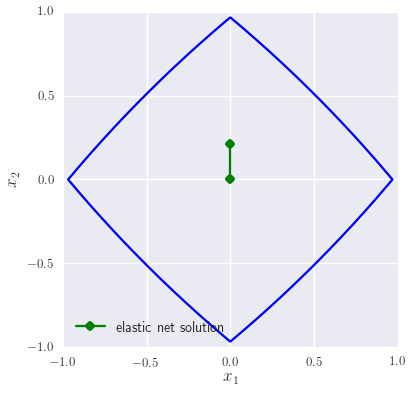

In [11]:
def solution(A, b, lambda1=0.1, lambda2=0.5):
    N = A.shape[1]
    x = cvx.Variable(N)
    objective = cvx.Minimize(cvx.sum_entries(cvx.square(A*x-b)) 
                             + lambda1*cvx.norm(x, 1)
                             + lambda2*cvx.norm(x, 2))

    prob = cvx.Problem(objective, [])

    prob.solve()
    return asarray(x.value).flat[:]

def draw_2d(lambda1=0.1, lambda2=0.5, c1=3, c2=2, b=0.5):
    A = array([[c1, c2]])
    x_hat = solution(A, b, lambda1=lambda1, lambda2=lambda2)
    print(x_hat)

    fig = figure(figsize=(6, 6))
    x1 = linspace(-1, 1)
    #plot(x1, (b - A.flat[0]*x1) / A.flat[1], 'm', 
    #        label='${2} = {0}\cdot x_1 + {1}\cdot x_2$'.format(c1, c2, b))
    plot([0, x_hat[0]], [0, x_hat[1]], 'go-', label='elastic net solution')

    norm_ball(x_hat, lambda1=lambda1, lambda2=lambda2)
    legend(loc='lower left')
    
    #lim, pad = 1/2, 0.1
    #xlim(-(lim+pad), (lim+pad))
    #ylim(-(lim+pad), (lim+pad))
    
    xlabel('$x_1$')
    ylabel('$x_2$')

    return fig

def norm_ball(x_hat, lambda1=1, lambda2=0.5):    
    a, b = lambda1, lambda2
    
    norm = np.linalg.norm
    n1 = norm(x_hat, ord=1) 
    n2 = norm(x_hat, ord=2)
    
    c = lambda1*n1 + lambda2*n2
    c /= (lambda1 + lambda2)
    #c *= 0.40
    
    # lambda1, lambda2 = 0.1, 0.1 ==> c *= 0.54
    # lambda1, lambda2 = 0.5, 0.5 ==> c *= 0.58
    # lambda1, lambda2 = 1.0, 0.5 ==> c *= 0.58
    # lambda1, lambda2 = 0.5, 1.0 ==> c *= 0.40
    
    
    print(c, np.max(x_hat))
    x = linspace(-10*np.max(x_hat), 10*np.max(x_hat), num=1e3)
    
    quad = np.sqrt(a**2 + 4*a*b*(-a*np.abs(x) - a*b*x**2 + c))
    
    for x_sign in [-1]:#, 1]:
        for y_sign in [-1, 1]:
            y = y_sign * (quad + x_sign*a) / (2*a*b)
            i = y_sign*y < 0 
            y[i] = nan
            
            plot(x, y, 'b')


f = draw_2d(c1=1, b=0.5, lambda1=0.2, lambda2=0.1)

# L1/L2

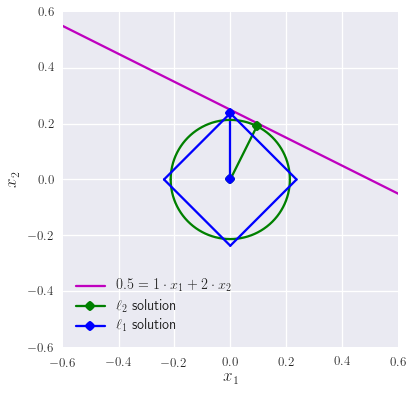

In [3]:
def solution(A, b, lambda_=0.1, norm=1):
    N = A.shape[1]
    x = cvx.Variable(N)
    objective = cvx.Minimize(cvx.sum_entries(cvx.square(A*x-b)) 
                             + lambda_*cvx.norm(x, norm))

    constraints = []
    prob = cvx.Problem(objective, constraints)

    prob.solve()
    return asarray(x.value).flat[:]
def norm_ball(x, norm='l1', c='b', MUL=1.1, size=(6, 6)):    
    if norm == 2:
        a = np.linalg.norm(x, ord=2)
        t = linspace(-a, a, num=1e3)
        plot(t, sqrt(a**2 - t**2), c)
        plot(t, -sqrt(a**2 - t**2), c)
    elif norm == 1:
        a = np.linalg.norm(x, ord=1)
        t = linspace(0, a, num=1e3)
        plot(t, a-t, c)
        plot(t, -a+t, c)
        t = linspace(-a, 0, num=1e3)
        plot(t, -t-a, c)
        plot(t, t+a, c)

A = array([[1, 2]])
b = 1
lambda_ = 0.1

def draw_2d(lambda_=0.1, c1=3, c2=2, b=0.5):
    A = array([[c1, c2]])
    x_l1 = solution(A, b, lambda_=lambda_, norm=1)
    x_l2 = solution(A, b, lambda_=lambda_, norm=2)

    fig = figure(figsize=(6, 6))
    x1 = linspace(-1, 1)
    plot(x1, (b - A.flat[0]*x1) / A.flat[1], 'm', label='${2} = {0}\cdot x_1 + {1}\cdot x_2$'.format(c1, c2, b))
    plot([0, x_l2[0]], [0, x_l2[1]], 'go-', label='$\ell_2$ solution')
    plot([0, x_l1[0]], [0, x_l1[1]], 'bo-', label='$\ell_1$ solution')

    norm_ball(x_l2, norm=2, c='g')
    norm_ball(x_l1, norm=1, c='b')
    legend(loc='lower left')
    
    lim, pad = 1/2, 0.1
    xlim(-(lim+pad), (lim+pad))
    ylim(-(lim+pad), (lim+pad))
    
    xlabel('$x_1$')
    ylabel('$x_2$')

    return fig

f = draw_2d(c1=1, b=0.5)

In [7]:
import ipywidgets
print(ipywidgets.__path__)
from ipywidgets import StaticInteract, RangeWidget, RadioWidget, DropDownWidget

lambdas = RangeWidget(0.1, 0.9, 0.1)
c1 = RangeWidget(-1.5, 4.5, 0.5)

w = StaticInteract(draw_2d, lambda_=lambdas, c1=c1)
w

['ipywidgets']


/Users/scott/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [9]:
s = w.html()
print(len(s) / 1024**2)

2.37509632111


In [10]:
f = open('w_l1l2_2d.html', 'wb')
print(s, file=f)
f.close()